In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [23]:
# import the dataset
data = pd.read_excel('ENB2012_data.xlsx') 
print(data.shape)
data.head(10)

(768, 9)


,X1,X2,X3,X4,X5,X6,X7,X8,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,21.97


In [24]:
#Memory usage and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y2    768 non-null float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


# Spliting the data in X and Y

Set variables & target functions

In [25]:
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y= data[['Y2']]

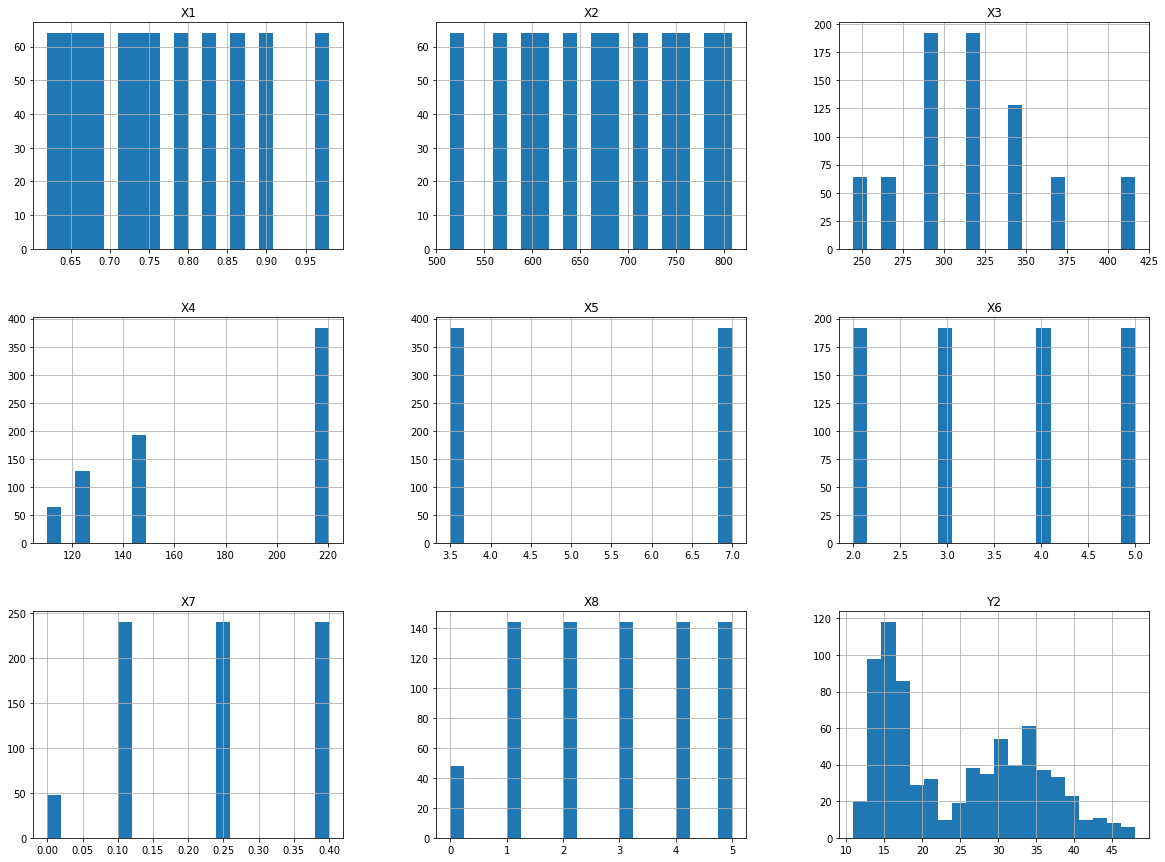

In [26]:
data.hist(bins=20, figsize=(20,15))
plt.show()

In [27]:
#Summary statistics
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,48.030000


In [28]:
#Normalize the inputs and set the output
from sklearn.preprocessing import Normalizer
nr = Normalizer(copy=False)

X = nr.fit_transform(X)

# Training the models

In [29]:
from sklearn.linear_model import Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

Find lambda by using 5 folds cross-validation

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2)

# Lasso regression

In [31]:
lasso_cv_model=LassoCV(alphas=(0.01, 0.03, 0.05, 0.07, 0.1, 0.5, 0.8, 1), cv =5)
lasso_cv_model.fit(X_train, Y_train)

print("The optimal value of lambda for Lasso Regression is: ", lasso_cv_model.alpha_)

The optimal value of lambda for Lasso Regression is:  0.01


In [32]:
#Predicting Test Data
Y_pred_lasso= lasso_cv_model.predict(X_test)

In [33]:
MAE_lasso= mean_absolute_error(Y_test, Y_pred_lasso)
MSE_lasso= mean_squared_error(Y_test, Y_pred_lasso)
RMSE_lasso= np.sqrt(MSE_lasso)

In [34]:
pd.DataFrame([MAE_lasso, MSE_lasso, RMSE_lasso], index=['MAE', 'MSE', 'RMSE'], columns=['Lasso Metrics'])

,Lasso Metrics
MAE,3.743910
MSE,24.200883
RMSE,4.919439


# Ridge regression

In [35]:
ridge_cv_model=RidgeCV(alphas=(0.01, 0.03, 0.05, 0.07, 0.1, 0.5, 0.8, 1), cv =5, scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train, Y_train)

print("The optimal value of lambda for Ridge Regression is: ", ridge_cv_model.alpha_)

The optimal value of lambda for Ridge Regression is:  0.01


In [36]:
#Predicting Test Data
Y_pred_ridge= ridge_cv_model.predict(X_test)

In [37]:
MAE_ridge= mean_absolute_error(Y_test, Y_pred_ridge)
MSE_ridge= mean_squared_error(Y_test, Y_pred_ridge)
RMSE_ridge= np.sqrt(MSE_ridge)

In [38]:
pd.DataFrame([MAE_ridge, MSE_ridge, RMSE_ridge], index=['MAE', 'MSE', 'RMSE'], columns=['Ridge Metrics'])

,Ridge Metrics
MAE,3.604480
MSE,22.770544
RMSE,4.771849


# Elastic Net

In [39]:
elastic_model= ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],cv=5, max_iter=100000)

In [40]:
elastic_model.fit(X_train, Y_train)
print("The optimal value of alpha for Ridge Regression is: ", elastic_model.l1_ratio_)

The optimal value of alpha for Ridge Regression is:  1.0


In [41]:
Y_pred_elastic=elastic_model.predict(X_test)
MAE_Elastic= mean_absolute_error(Y_test, Y_pred_elastic)
MSE_Elastic= mean_squared_error(Y_test, Y_pred_elastic)
RMSE_Elastic= np.sqrt(MSE_Elastic)

In [42]:
pd.DataFrame([MAE_Elastic, MSE_Elastic, RMSE_Elastic], index=['MAE', 'MSE', 'RMSE'], columns=['Elastic Metrics'])

,Elastic Metrics
MAE,3.162708
MSE,18.473884
RMSE,4.298126


# Conclusion

By using 5-fold cross validation to compare their performance based on mean squared error(MSE), we observe that MSE of Elastic Net is smallest. Hence we can state that Elastic model is best of them.